## RODRIGO ROQUETE 

# Projeto 1 - Ciencia dos Dados


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
co2 = pd.read_excel("co2_emissions_tonnes_per_person.xlsx")
industrias = pd.read_excel("industry_percent_of_gdp.xlsx")
IDH = pd.read_excel ("hdi_human_development_index.xlsx")

# introduzindo o tema

quando se fala de industrialização , na hora se pensa em países desenvolvidos , porém, quando se fala em industrias a emissão de CO2 está diretamente relacionada. E isso tende a diminuir a expectativa de vida da população então será que países com mais industrialização tendem a ter uma menor expectativa de vida ? 

In [3]:
co2_2011 = co2.loc[:, ["geo", 2011]]
ind_2011 = industrias.loc[:,["geo", 2011]]
IDH_2011 = IDH.loc[:,["geo",2011]]

# CO2


In [4]:
co2_2011.head(10)

,geo,2011
0,Afghanistan,0.412
1,Albania,1.790
2,Algeria,3.290
3,Andorra,5.870
4,Angola,1.250
5,Antigua and Barbuda,5.360
6,Argentina,4.600
7,Armenia,1.710
8,Australia,17.400
9,Austria,7.690


agora indexando os indices do co2 :

In [5]:
co2_idx = co2_2011.set_index('geo')

# Industrialização

In [6]:
ind_2011.head(10)

,geo,2011
0,Afghanistan,23.5
1,Albania,28.2
2,Algeria,52.7
3,Andorra,13.6
4,Angola,NaN
5,Antigua and Barbuda,16.9
6,Argentina,30.0
7,Armenia,33.8
8,Australia,28.5
9,Austria,28.6


In [7]:
ind_idx = ind_2011.set_index('geo')

# IDH


In [8]:
IDH_2011.head(10)


,geo,2011
0,Afghanistan,0.463
1,Albania,0.752
2,Algeria,0.732
3,Andorra,0.819
4,Angola,0.508
5,Antigua and Barbuda,0.778
6,Argentina,0.822
7,Armenia,0.732
8,Australia,0.930
9,Austria,0.884


In [9]:
IDH_idx = IDH_2011.set_index('geo')

---> dando join primeiro para averiguar a relação da porcentagem de industrias com produçao de gás carbônico 

In [10]:
df = co2_idx.join(ind_idx, how='inner', lsuffix='_co2', rsuffix='_industrias')
df.head(10)

,2011_co2,2011_industrias
geo,,
Afghanistan,0.412,23.5
Albania,1.790,28.2
Algeria,3.290,52.7
Andorra,5.870,13.6
Angola,1.250,NaN
Antigua and Barbuda,5.360,16.9
Argentina,4.600,30.0
Armenia,1.710,33.8
Australia,17.400,28.5


---> agora dando join com o IDH para averiguar se também há uma relação entre eles 

In [11]:
data = df.join(IDH_idx, how="inner")
data.head(10)




,2011_co2,2011_industrias,2011
geo,,,
Afghanistan,0.412,23.5,0.463
Albania,1.790,28.2,0.752
Algeria,3.290,52.7,0.732
Andorra,5.870,13.6,0.819
Angola,1.250,NaN,0.508
Antigua and Barbuda,5.360,16.9,0.778
Argentina,4.600,30.0,0.822
Armenia,1.710,33.8,0.732
Australia,17.400,28.5,0.930


In [12]:
data = data.rename(columns={"2011_co2":"CO2", "2011_industrias":"Industrias", 2011:"IDH"})
data.head(10)

,CO2,Industrias,IDH
geo,,,
Afghanistan,0.412,23.5,0.463
Albania,1.790,28.2,0.752
Algeria,3.290,52.7,0.732
Andorra,5.870,13.6,0.819
Angola,1.250,NaN,0.508
Antigua and Barbuda,5.360,16.9,0.778
Argentina,4.600,30.0,0.822
Armenia,1.710,33.8,0.732
Australia,17.400,28.5,0.930


In [13]:
data = data.dropna()
data.head(10)

,CO2,Industrias,IDH
geo,,,
Afghanistan,0.412,23.5,0.463
Albania,1.790,28.2,0.752
Algeria,3.290,52.7,0.732
Andorra,5.870,13.6,0.819
Antigua and Barbuda,5.360,16.9,0.778
Argentina,4.600,30.0,0.822
Armenia,1.710,33.8,0.732
Australia,17.400,28.5,0.930
Austria,7.690,28.6,0.884


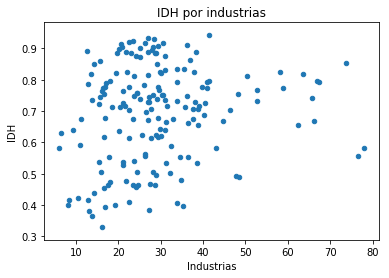

In [14]:

data.plot.scatter(y ="IDH", x = "Industrias" , title = "IDH por industrias")


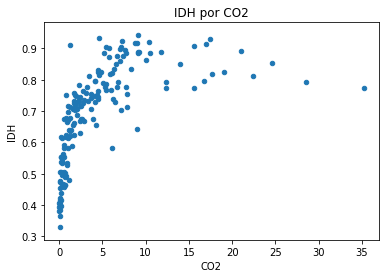

In [15]:
data.plot.scatter(y ="IDH", x = "CO2" , title = "IDH por CO2")


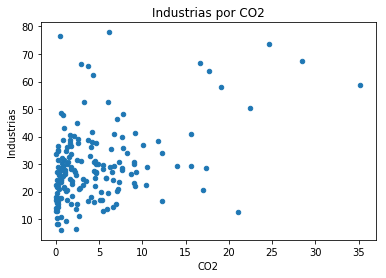

In [16]:
data.plot.scatter(y ="Industrias", x = "CO2" , title = "Industrias por CO2")

# apresentação das co-relações 

In [17]:
data.corr()

,CO2,Industrias,IDH
CO2,1.000000,0.405320,0.600384
Industrias,0.405320,1.000000,0.162098
IDH,0.600384,0.162098,1.000000


# conclusão: 

conclui - se então que a liberação de CO2 , gerada por um maior numero de industrias não está muito relacionada com a diminuição da expectativa de vida , diretamente relacionada com o IDH. Isso pode ser devido ao fato de que os países desenvolvidos têm outras formas para gerar energia, produzir materiais, uma forma na qual não ocorre a queima de CO2.